# Base de données relationnelles et langage SQL

Une base de données relationnelle en (anglais Relational DataBase Management System (RDBMS)) permet de stocker des informations organisées en tables à deux dimensions, les lignes et les colonnes.

Pour lire,ajouter, modifier et supprimer  des données, on utilise le langage SQL (Strutured Query Language).

Dans ce cours, nous allons utilisé le systèmes de gestion de bases de données relationnelles (SGBDR) PostgreSQL. C'est le logiciel le plus utilisé d'après cette étude de stackoverflow. 

https://survey.stackoverflow.co/2023/#most-popular-technologies-database

Les bases de données relationnelles et le langage SQL restent les bases de données les plus présentes et utilisées. Il existe d'autres types de bases de données dîtes NoSQL (not only SQL). Les données ne sont pas plus stockées dans des tables mais par clé-valeur, documents ou graphes...

Le choix de la technologie dépend des cas d'usage, en fonction de si on a besoin de rapidité ou de flexibilité dans son modèle de données.

Après cette brève introduction, nous allons installer la base de données PostgreSQL et l'interface graphique pour l'administrer pgAdmin, en suivant ce lien :

https://www.postgresql.org/download/

Vous pouvez accepter la configuration par défaut et décocher stackbuilder lors de la dernière étape.



## Création d'une base de données

Nous allons créer la base de données, les tables et écrire les requêtes SQL à travers pgAdmin. 

PgAdmin est une interface graphique pour interagir avec la base de données PostgreSQL. A l'aide du menu et de quelques clics, on peut réaliser l'ensemble des opérations sur la base. On peut retrouver le code SQL pour chaque manipulation avec l'interface.

Après l'installation, pgAdmin est connecté au `serveur PostgreSQL` installé en local sur la machine. On peut voir ce serveur dans `l'Object Explorer`.

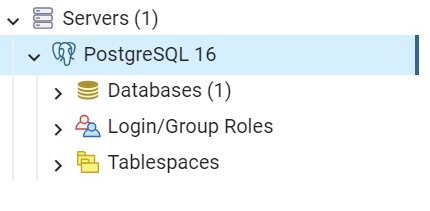


Ce serveur vient avec une base de données `postgres`.

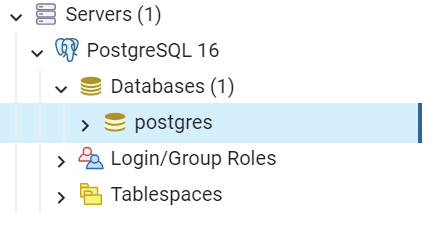

Nous allons créer une nouvelle base de donnée en faisant un clic droit sur Databases.

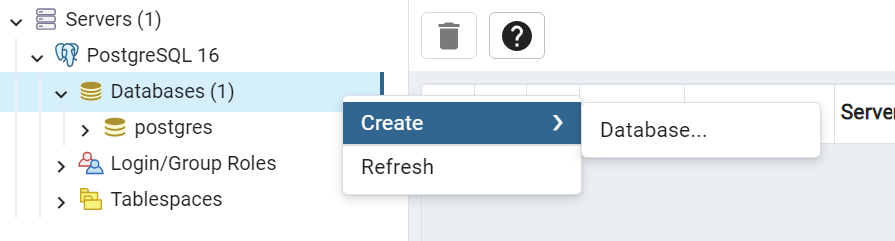

Nous allons appeler cette base `learning`. On garde la configuration par défaut.

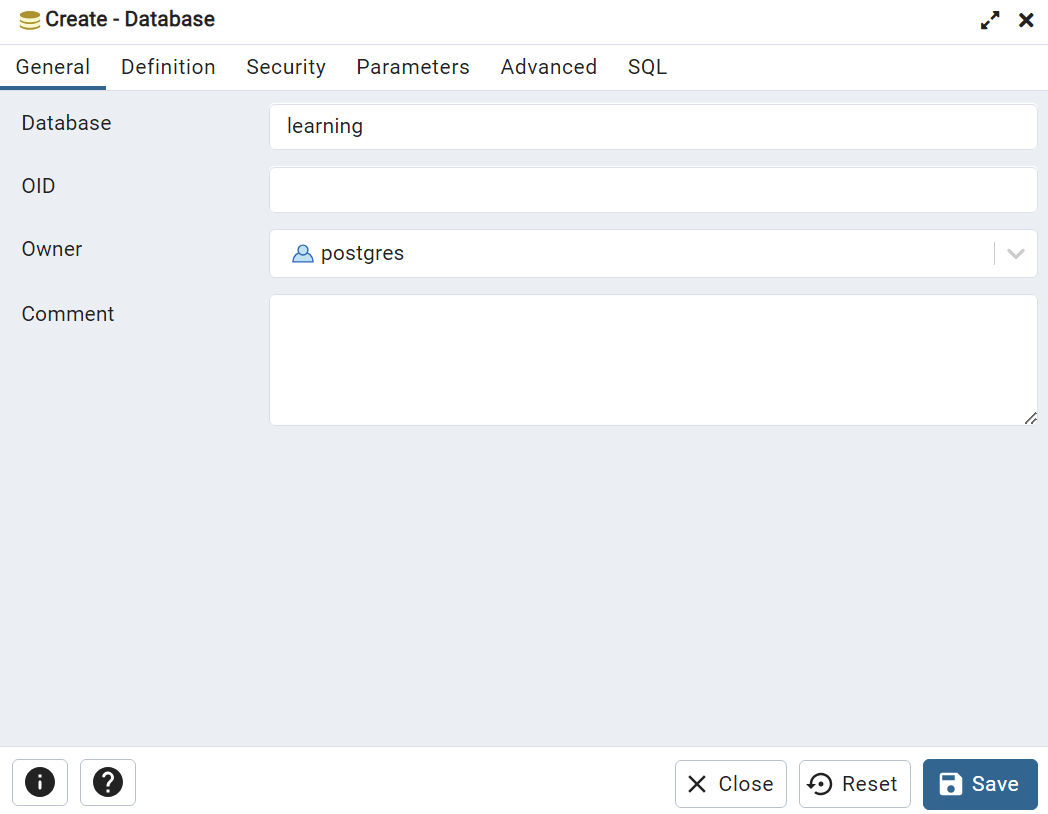

Dans l'onglet SQL, on peut voir le code SQL correspondant à l'action que l'on réalise via l'interface graphique.

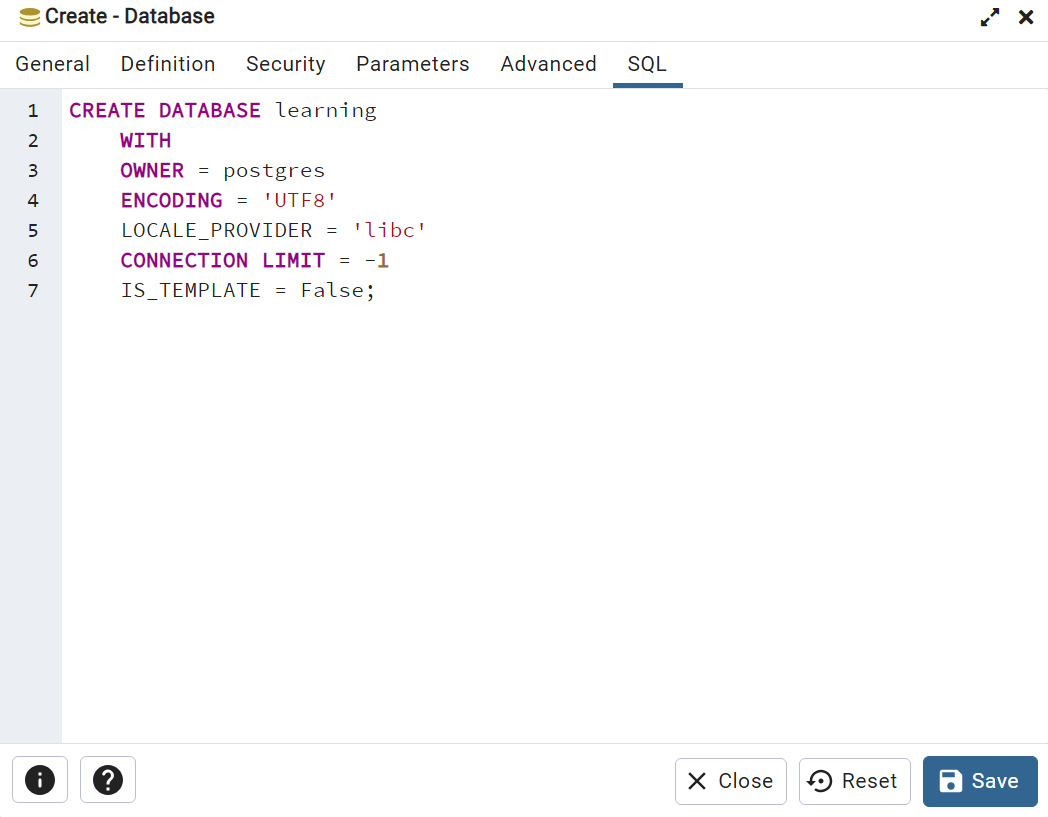

Une fois le code exécuter, on a la base de données learning créée avec le schéma public.

Dans la suite de l'exercice, nous allons utiliser cette base et ce schéma.

## Création d'une table

Nous allons créer une table en faisant un clic droit sur Tables.

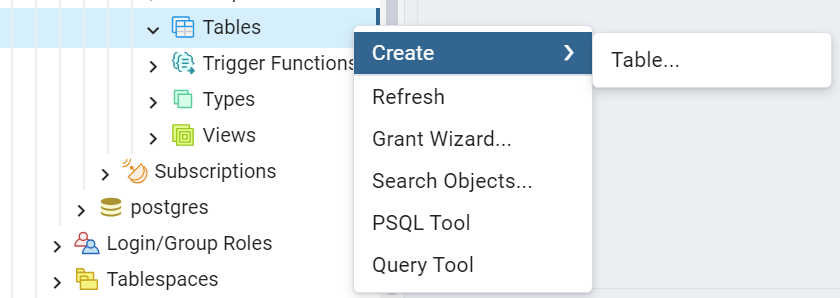

On nomme la table `client`. Elle regroupe les informations sur les clients.

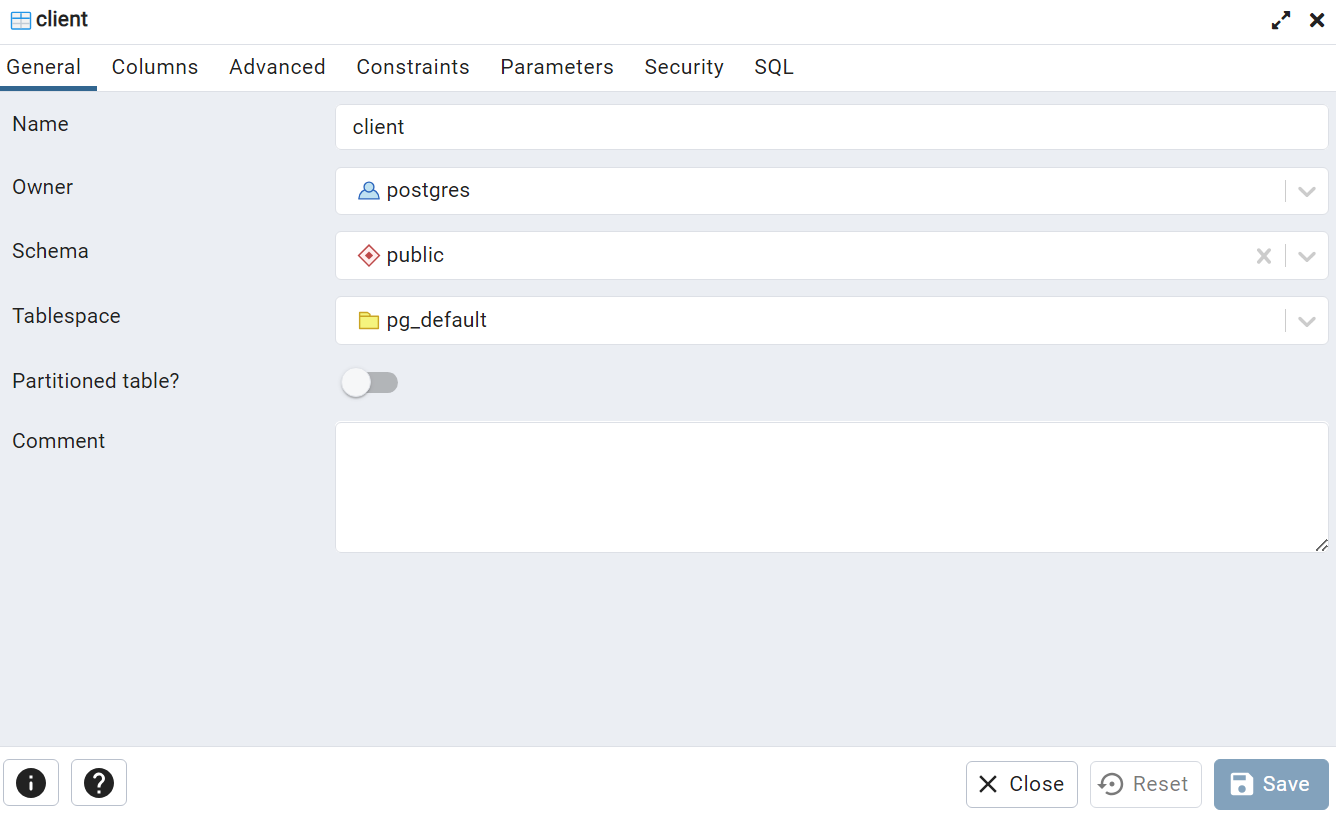

On définit les colonnes suivantes dans notre table `client` :

  `id` - code du client ; `clé primaire` ; non null ; de type Serial, un nombre entier qui s'auto-incrémente.
  
  `first_name` - prénom de famille du client ; non null ; de type character varying (string) longueur 255.

  `middle_name` - deuxième prénom du client ; de type character varying (string) longueur 255.

  `last_name` - nom de famille du client ; non null ; de type character varying (string) longueur 255.

  `birth_date` - date de naissance du client ; non null ; de type timestamp without timezone (date).

  `email_address` - adresse email du client ; non null ; de type character varying (string) longueur 255.

  `department` - numéro du département du client ; de type integer.

  NB : Le code SQL correspondant à la création de la table peut être retrouvé dans l'onglet SQL.

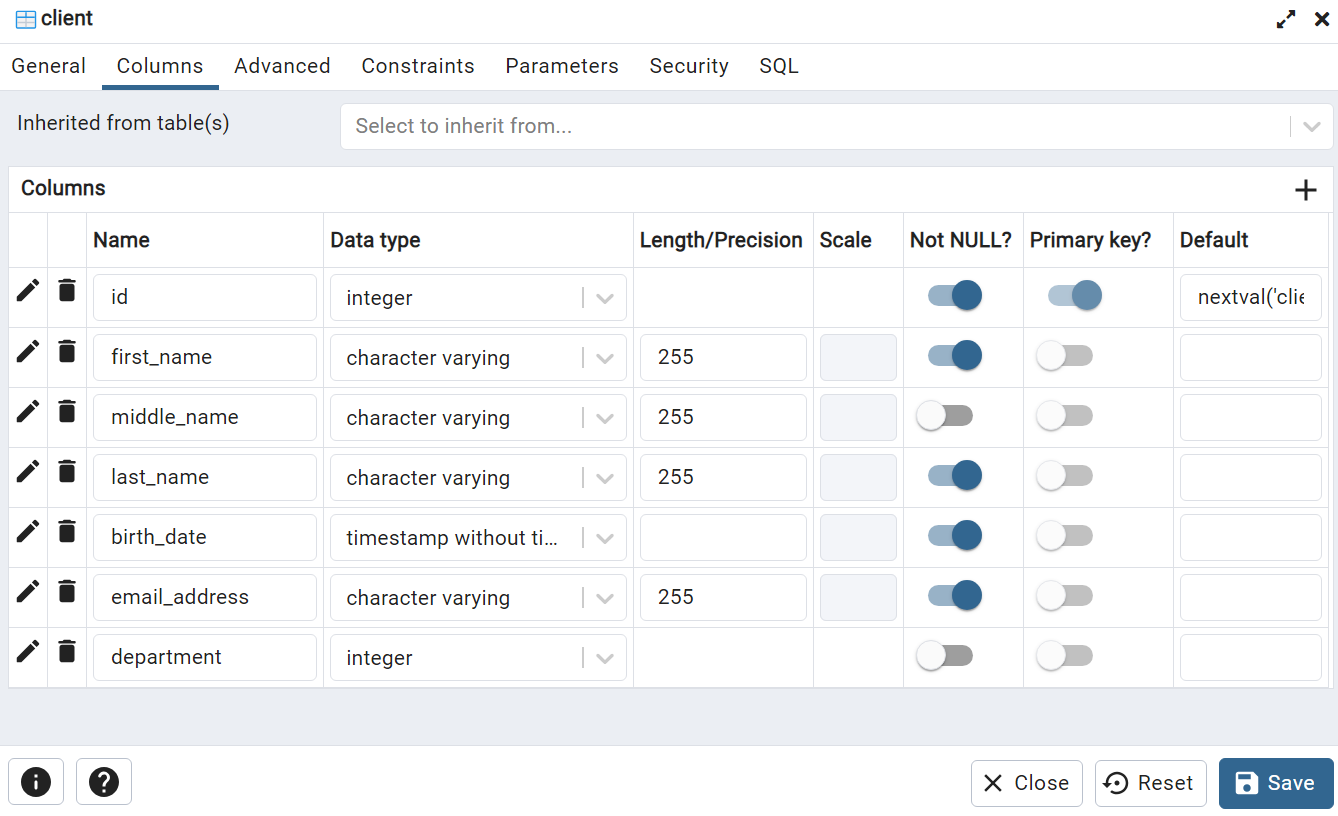

### La clé primaire

La clé primaire est la donnée qui permet d'identifier une ligne unique. Deux mêmes lignes ne peuvent pas avoir le même clé primaire. Par convention, une clé primaire est définie par une colonne unique et est artificielle. C'est à dire que c'est une colonne créée distincte des autres colonnes de la table.

### La contrainte unique

En plus de la clé primaire, on peut définir une contrainte d'unicité sur plusieurs aux colonnes. Dans notre exemple, on souhaite que l'email du client soit unique.

Dans les propriétés de la table.

On accède à l'onglet contrainte, Unique. On ajoute une contrainte en sélectionnant le bouton `+`.

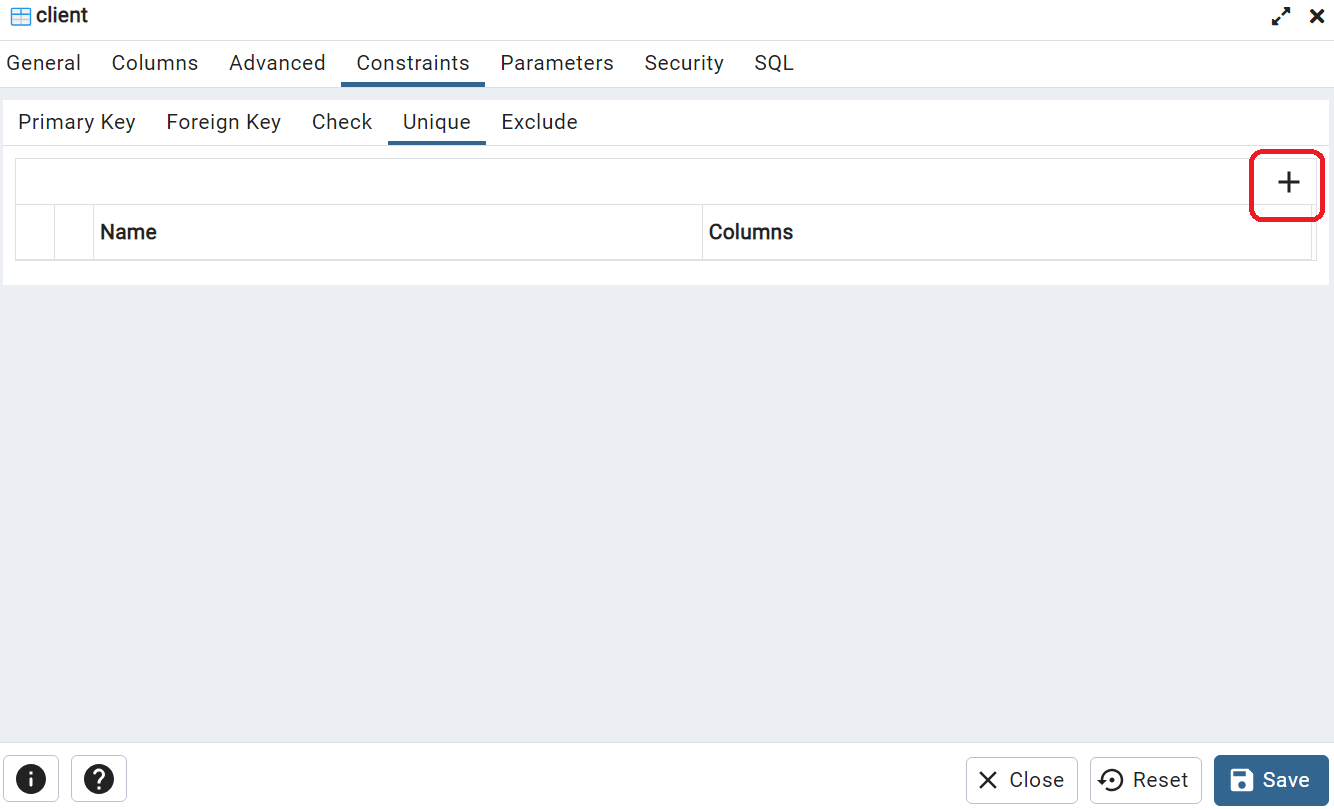

Dans la définition, on ajoute la colonne email_address qui doit être unique.

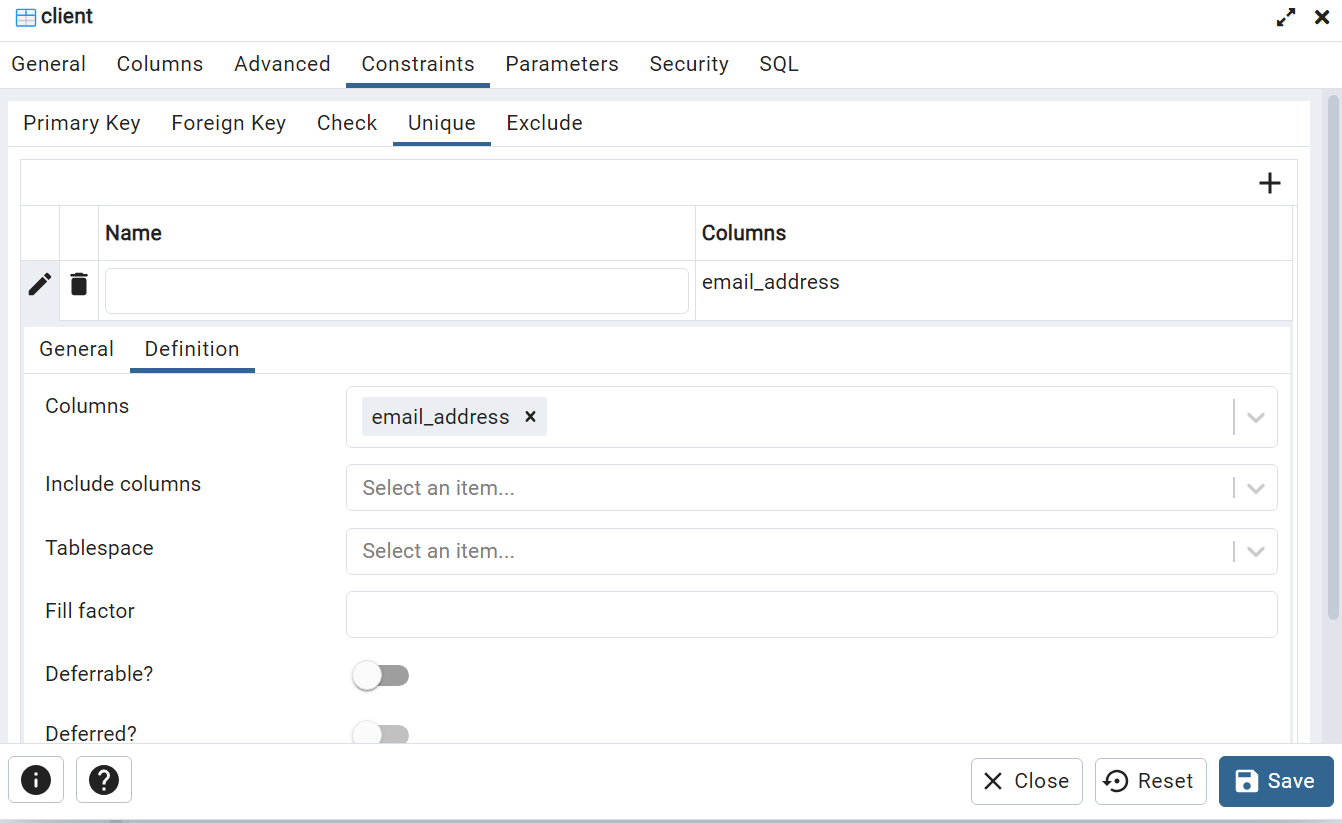

### Création de la table product

Elle regroupe les informations sur les produits.

On créé la table `product` avec les colonnes suivantes :

On définit les colonnes suivantes dans notre table :

  `id` - code du produit ; `clé primaire` ; non null ; de type Serial, un nombre entier qui s'auto-incrémente.
  
  `product_name` - nom du produit ; non null ; de type character varying (string) longueur 255.

  `product_weight` - poids du produit ; non null ; de type double.

  `product_description` - description du produit ; non null ; de type character varying (string) longueur 2000.


Le code SQL pour créér cette table :

```
-- Table: public.product

DROP SEQUENCE IF EXISTS product_id_seq;

CREATE SEQUENCE product_id_seq;

DROP TABLE IF EXISTS public.product;

CREATE TABLE IF NOT EXISTS public.product
(
    id integer NOT NULL DEFAULT nextval('product_id_seq'::regclass),
    product_name character varying(255) COLLATE pg_catalog."default" NOT NULL,
    product_weight double precision NOT NULL,
    product_description character varying(200) COLLATE pg_catalog."default" NOT NULL,
    CONSTRAINT product_pkey PRIMARY KEY (id)
)

TABLESPACE pg_default;

ALTER TABLE IF EXISTS public.product
    OWNER to postgres;
```

### Création de la table transaction

Elle regroupe les transactions, les produits achetés pas les clients.

On créé la table `transaction` avec les colonnes suivantes :

On définit les colonnes suivantes dans notre table :

  `id` - code de la transaction ; `clé primaire` ; non null ; de type Serial, un nombre entier qui s'auto-incrémente.
  
  `client_id` - code du client ; non null ; de type integer.

  `product_id` - code du produit ; non null ; de type integer.

  `quantity` - quantité ; non null ; de type double.

  `unit_price` - dprix unitaire ; non null ; de type double.


### La clé étrangère

La clé étrangère garantie l'intégrité référentielle entre deux tables. Une clé étrangère est une ou plusieurs colonnes d'une table, l'ensemble des données de ces colonnes référencées doivent apparaître dans les colonnes de l'autre table référençante. Souvent une clé étrangère est liée à une clé primaire.

On ajoute deux contraintes de clés étrangères sur la table `transaction`.



Sur le client_id :

Tous les codes clients des transactions doivent êtres des codes de la table client.

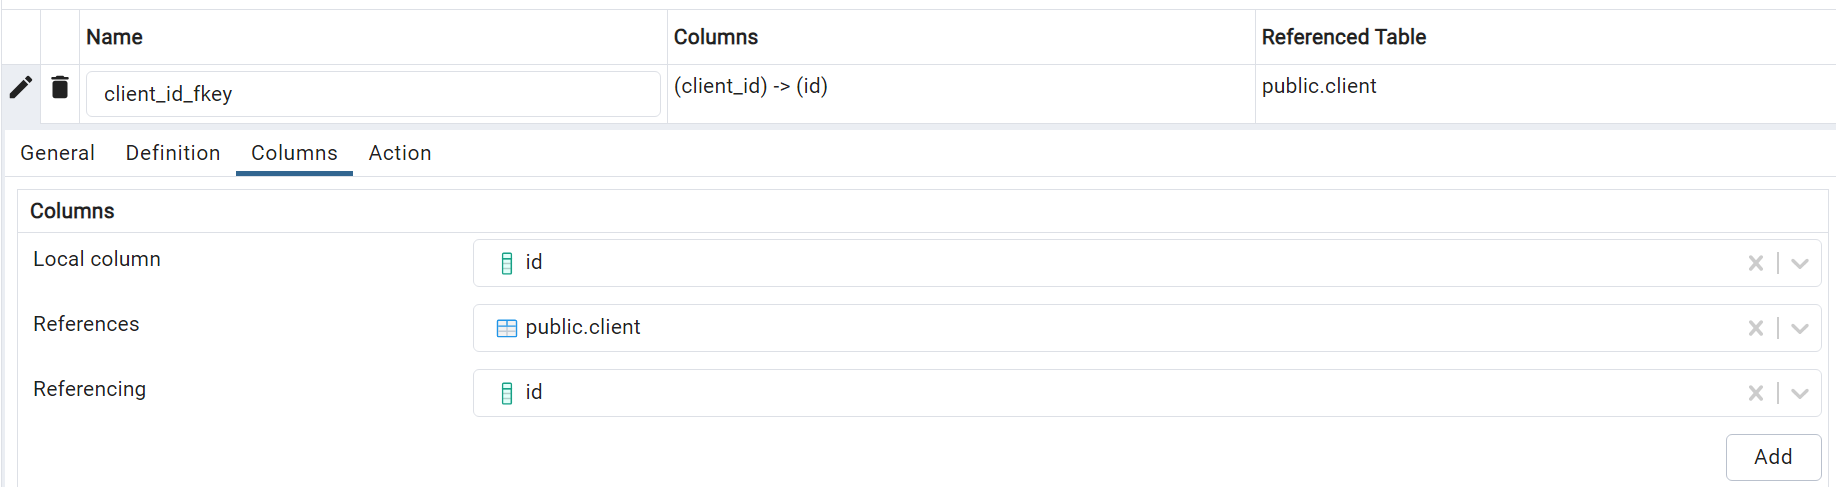

et sur le product_id :

Tous les codes produits des transactions doivent être des codes dans la table produit.

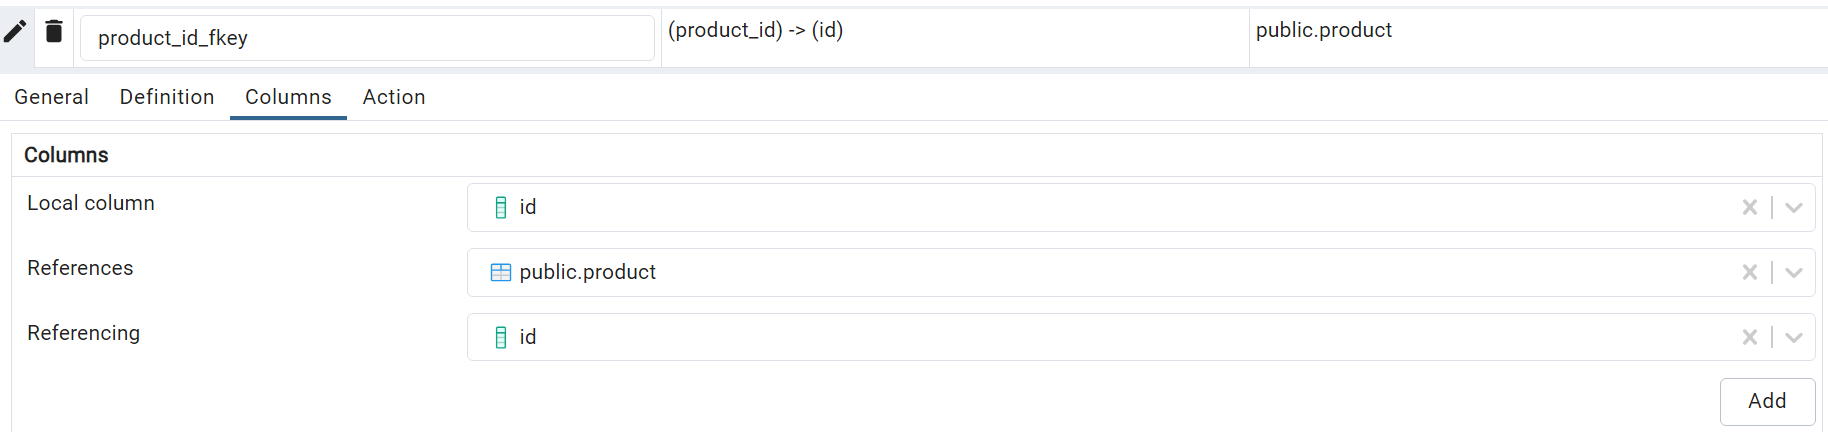

Le code SQL pour la création de la table transaction avec les contraintes de clés étrangères.

```
-- Table: public.transaction

DROP SEQUENCE IF EXISTS transaction_id_seq;

CREATE SEQUENCE transaction_id_seq;

DROP TABLE IF EXISTS public.transaction;

CREATE TABLE IF NOT EXISTS public.transaction
(
    id integer NOT NULL DEFAULT nextval('transaction_id_seq'::regclass),
    client_id integer NOT NULL,
    product_id integer NOT NULL,
    quantity double precision NOT NULL,
    unit_price double precision NOT NULL,
    CONSTRAINT transaction_pkey PRIMARY KEY (id),
    CONSTRAINT client_id_fkey FOREIGN KEY (client_id)
        REFERENCES public.client (id) MATCH SIMPLE
        ON UPDATE NO ACTION
        ON DELETE NO ACTION
        NOT VALID,
    CONSTRAINT product_id_fkey FOREIGN KEY (product_id)
        REFERENCES public.product (id) MATCH SIMPLE
        ON UPDATE NO ACTION
        ON DELETE NO ACTION
        NOT VALID
)

TABLESPACE pg_default;

ALTER TABLE IF EXISTS public.transaction
    OWNER to postgres;
```